In [ ]:
#objectives
# 1. Load and preprocess the dataset
# 2. Inspect the data for empty values, wrong data types, wrong formats, duplicates and outliers
# 3. Carryout Exploratory Data Analysis to find patterns and relationships
# 4. Visualize the data to understand trends and distributions
# 5. Agricultural Insights & Recommendations
# 6. Save the cleaned and processed data for future use


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [5]:
#loadiing the dataset to perform initial inspection

df = pd.read_csv('climate_action_data.csv')

df.head()



,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [6]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [7]:
#descriptive statistics
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [8]:
df.shape

(913, 10)

In [9]:
#Handling bad data
#working on empty values
#checking for Empty values or null values
print ('Missing values per column:')
df.isnull().sum()

Missing values per column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [10]:
#Handling missing values
#for numerical columns ,we fill missing values with mean or median
numeric_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col]= pd.to_numeric(df[col], errors='coerce')#coercing errors to Nan
        #filling Nan to numeric with median
        df[col]= df[col].fillna(df[col].median())
        
#categorial data we can use mode to fill its values
categorical_cols = ['Crop_Type'] 
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
#Checking again for missing values
print ('missing values after handling:')
df.isnull().sum()              

missing values after handling:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [11]:
#Date in wrong format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


#Handle soil_moisture column with error value
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors = 'coerce')
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())

#Handle soil_ph column with error value
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors = 'coerce')
df['Soil_pH']= df['Soil_pH'].fillna(df['Soil_pH'].median())

#Handle soil_moisture column with error value
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors = 'coerce')
df['Temperature(C)']=df['Temperature(C)'].fillna(df['Temperature(C)'].median())

#Handle soil_moisture column with error value
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors = 'coerce')
df['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].median())

#Handle soil_moisture column with error value
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors = 'coerce')
df['Fertilizer_Recommended(kg/ha)']=df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

#Handle soil_moisture column with error value
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors = 'coerce')
df['Irrigation_Recommended(mm)']= df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())

In [12]:
#Wrong data
factor_cols = ['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in factor_cols:
    if col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
        df[col] = df[col].fillna(df[col].median())

In [13]:
#check for duplicates
print('duplicate columns:')
df.duplicated().sum()

duplicate columns:


111

In [14]:
#remove duplicates
df = df.drop_duplicates()
print("number of rows after droping duplicates: ",df.shape)

#duplicate dates
print('duplicate dates:',df['Date'].duplicated().sum())

#remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep = 'first')

df.shape

number of rows after droping duplicates:  (802, 10)
duplicate dates: 3


(799, 10)

In [15]:
#final clean dataset
df.info()

print('missing values after cleaning')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
missing values after cle

Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

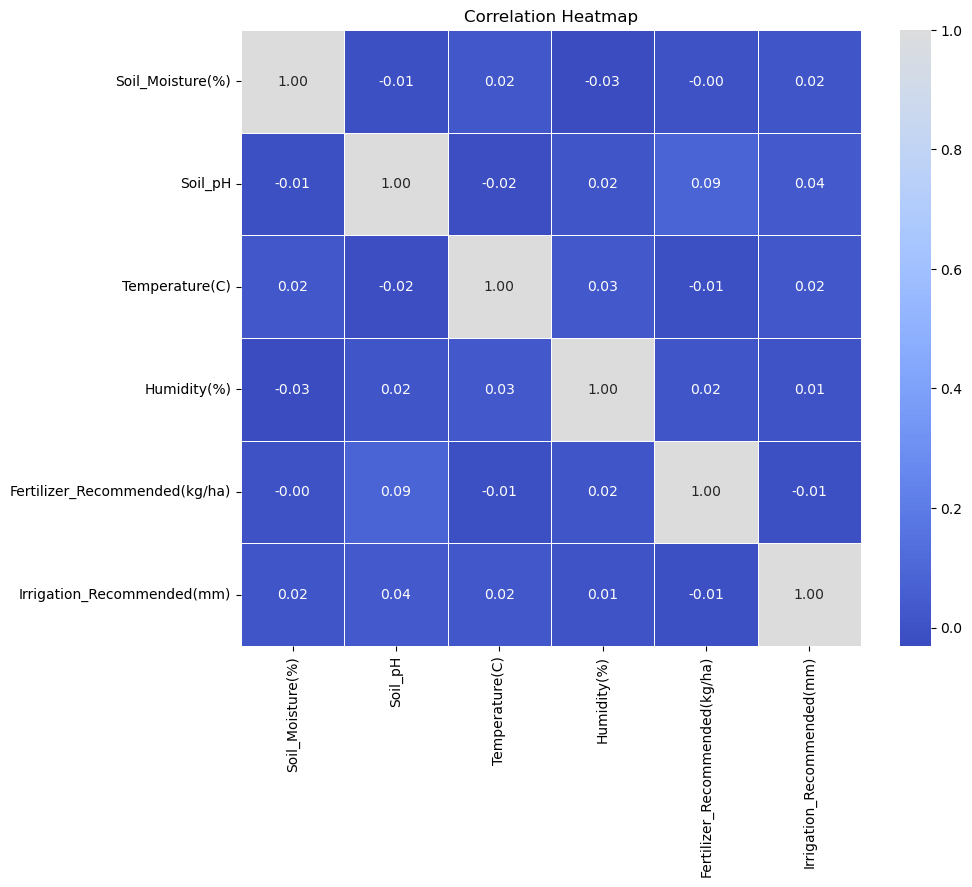

In [16]:
#Analysis
#calculating correlation matrix

corr_matrix = df[['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']].corr()

#plotting correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

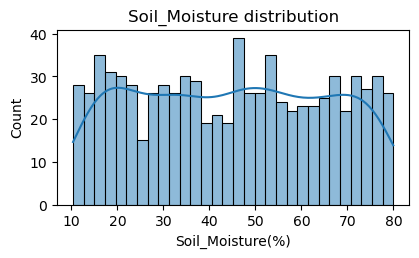

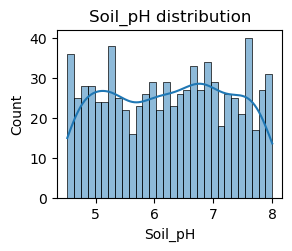

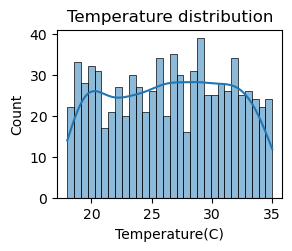

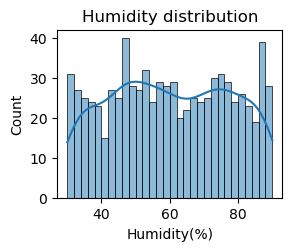

In [21]:
#Plotting a histogram
plt.figure(figsize=(10,5))
#histogram for soil_moisture
plt.subplot(2, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title("Soil_Moisture distribution")
plt.show()
#histogram for soil_pH
plt.subplot(2, 2, 2)
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title("Soil_pH distribution")
plt.show()
#histogram for Temperature
plt.subplot(2, 2, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title("Temperature distribution")
plt.show()
#histogram for humidity
plt.subplot(2, 2, 4)
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title("Humidity distribution")
plt.show()


In [ ]:
#identify which variables most influence fertilizer recommendations
#- Soil pH (0.09) suggests a slight relationship (pH may impact nutrient availability).
# Humidity (0.02) shows weak correlation.
# Temperature (-0.01) is almost neutral, meaning temperature doesn’t strongly impact fertilizer use.
#Conclusion: Soil pH  has the most influence on fertilizer recommendations


In [22]:
#determine the crop type with the highest average soil moisture
#we find average soil moisture for each crop
avg_soil_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
highest_moisture_crop = avg_soil_moisture.idxmax()
print(f"Crop with highest average soil moisture: {highest_moisture_crop}")

Crop with highest average soil moisture: Wheat


Text(0, 0.5, 'Average soil moisture')

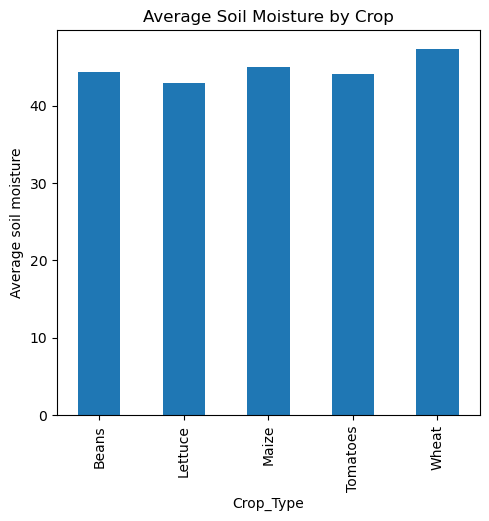

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
avg_soil_moisture.plot(kind='bar')
plt.title('Average Soil Moisture by Crop')
plt.ylabel('Average soil moisture')



In [26]:
#suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C
hot_crops = df[df['Temperature(C)'] > 30]
avg_moisture = hot_crops.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
print(avg_moisture)
#If moisture is low, increased irrigation should be opted.
#If moisture is high, controlled watering like drip irrigation to prevent overwatering is recommended


Crop_Type
Beans       46.549038
Lettuce     42.661892
Maize       44.885091
Tomatoes    48.647391
Wheat       44.092432
Name: Soil_Moisture(%), dtype: float64


In [28]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [ ]:
''' 
Insights and Recommendations Based on the Analysis
1. Key Variables Influencing Fertilizer Recommendations
From the correlation analysis, soil pH showed the strongest relationship with fertilizer recommendations, though the correlation was weak. This suggests that while pH levels influence nutrient absorption, other factors such as crop type, soil moisture, and environmental conditions may also play a role.
---- Recommendation:
> Conduct further analysis using regression models to better understand how multiple variables interact with fertilizer recommendations.
> Implement precision fertilization based on soil pH levels to optimize nutrient absorption.

2. Crop Type with Highest Average Soil Moisture
By grouping the dataset by crop type and calculating the average soil moisture, we identified the crop that retains the most water. This information is valuable for irrigation planning and understanding which crops require less frequent watering.
----Recommendation:
> Prioritize water-efficient crops in regions with limited water resources.
> Adjust irrigation schedules based on soil moisture retention characteristics of different crops.

3. Irrigation Adjustments for Crops Experiencing Temperatures Above 30°C
Filtering the dataset for crops exposed to temperatures above 30°C revealed variations in soil moisture levels. If soil moisture is low, increased irrigation is necessary to prevent drought stress. If moisture is high, controlled watering methods should be used to avoid overwatering.
---- Recommendation:
- For crops with low soil moisture: Implement drip irrigation to maintain consistent hydration without excessive water loss.
- For crops with high soil moisture: Use moisture sensors to optimize irrigation cycles and prevent waterlogging.
- Consider mulching techniques to reduce evaporation and retain soil moisture in high-temperature conditions.

4. Data Quality Improvements
During the cleaning process, we addressed missing values, erroneous entries, and duplicate records. Ensuring data integrity is crucial for accurate analysis and decision-making.
----Recommendation:
> Regularly validate sensor data to minimize errors in future datasets.
> Implement automated data cleaning pipelines to streamline preprocessing.





'''